📊 Desafio 62 — Análise de Acidentes de Trânsito

Este dataset contém registros de acidentes de trânsito em uma capital brasileira, incluindo informações sobre data, horário, clima, tipo de acidente, número de feridos e localização.

🔍 Tarefas:

Tratamento de Dados
- Verifique se há inconsistências na coluna de datas e horários. Converta os campos para formatos adequados (datetime) e crie novas colunas como "hora do dia" e "dia da semana".

Análise Exploratória
- Quais são os três bairros com maior número de acidentes? Existe algum padrão de dias ou horários com mais ocorrências?

Visualização
- Crie um gráfico de barras mostrando o número de acidentes por tipo (ex: colisão, atropelamento, capotamento...).

Machine Learning (Classificação Simples)
- Crie uma variável binária: acidente_grave (1 se houve feridos ou mortos, 0 caso contrário).
Treine um modelo para prever acidentes graves com base em horário, clima, dia da semana e tipo de acidente. Use RandomForestClassifier e avalie com classification_report.

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [31]:
df = pd.read_csv("dia_62_acidentes_transito.csv")
df.head()

,data,horario,clima,tipo_acidente,feridos,mortos,bairro
0,2023-01-01,00:00:00,Céu limpo,Colisão,0,0,Centro
1,2023-01-02,01:00:00,Chuva leve,Atropelamento,1,0,Zona Sul
2,2023-01-03,02:00:00,Nublado,Capotamento,2,0,Zona Norte
3,2023-01-04,03:00:00,Nevoeiro,Engavetamento,0,1,Zona Leste
4,2023-01-05,04:00:00,Céu limpo,Colisão,3,0,Centro


In [32]:
#Verifique se há inconsistências na coluna de datas e horários. Converta os campos para formatos adequados (datetime) 
#e crie novas colunas como "hora do dia" e "dia da semana".
df["data"] = pd.to_datetime(df["data"] + " " + df["horario"], errors="coerce")
df["hora_dia"] = df["data"].dt.hour
df["dia_semana"] = df["data"].dt.day_name()
df.head()

,data,horario,clima,tipo_acidente,feridos,mortos,bairro,hora_dia,dia_semana
0,2023-01-01 00:00:00,00:00:00,Céu limpo,Colisão,0,0,Centro,0,Sunday
1,2023-01-02 01:00:00,01:00:00,Chuva leve,Atropelamento,1,0,Zona Sul,1,Monday
2,2023-01-03 02:00:00,02:00:00,Nublado,Capotamento,2,0,Zona Norte,2,Tuesday
3,2023-01-04 03:00:00,03:00:00,Nevoeiro,Engavetamento,0,1,Zona Leste,3,Wednesday
4,2023-01-05 04:00:00,04:00:00,Céu limpo,Colisão,3,0,Centro,4,Thursday


In [41]:
#Quais são os três bairros com maior número de acidentes? Existe algum padrão de dias ou horários com mais ocorrências?
bairros_acidentes = df["bairro"].value_counts()
print(bairros_acidentes)

acidentes_dia = df["dia_semana"].value_counts()
print("\n")
print(acidentes_dia)

acidentes_hora = df["hora_dia"].value_counts().sort_index()
print("\n")
print(acidentes_hora)

bairro
Centro        25
Zona Sul      25
Zona Norte    25
Zona Leste    25
Name: count, dtype: int64


dia_semana
Sunday       15
Monday       15
Tuesday      14
Wednesday    14
Thursday     14
Friday       14
Saturday     14
Name: count, dtype: int64


hora_dia
0     5
1     5
2     5
3     5
4     4
5     4
6     4
7     4
8     4
9     4
10    4
11    4
12    4
13    4
14    4
15    4
16    4
17    4
18    4
19    4
20    4
21    4
22    4
23    4
Name: count, dtype: int64


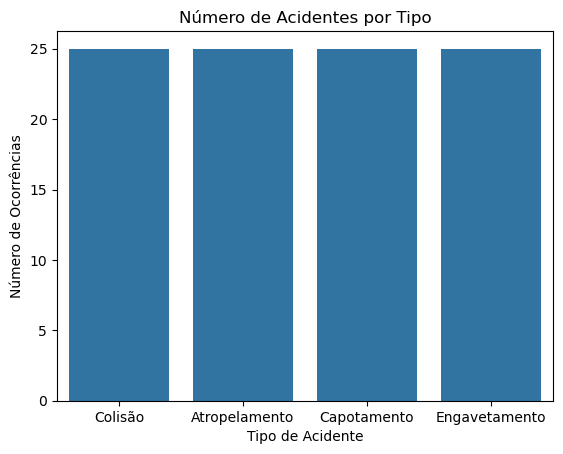

In [48]:
#Crie um gráfico de barras mostrando o número de acidentes por tipo (ex: colisão, atropelamento, capotamento...).
sns.countplot(df, x="tipo_acidente")
plt.title("Número de Acidentes por Tipo")
plt.ylabel("Número de Ocorrências")
plt.xlabel("Tipo de Acidente")
plt.show()

In [60]:
#Crie uma variável binária: acidente_grave (1 se houve feridos ou mortos, 0 caso contrário).
#Treine um modelo para prever acidentes graves com base em horário, clima, dia da semana e tipo de acidente.
#Use RandomForestClassifier e avalie com classification_report.

df["acidente_grave"] = ((df["feridos"] > 0) | (df["mortos"] > 0)).astype(int)

le_dia = LabelEncoder()
le_clima = LabelEncoder()
le_acidente = LabelEncoder()
le_bairro = LabelEncoder()

df["dia_semana"] = le_dia.fit_transform(df["dia_semana"])
df["clima"] = le_clima.fit_transform(df["clima"])
df["tipo_acidente"] = le_acidente.fit_transform(df["tipo_acidente"])
df["bairro"] = le_bairro.fit_transform(df["bairro"])

X = df.drop(["data", "horario", "acidente_grave", "feridos", "mortos"], axis=1)
y = df["acidente_grave"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8666666666666667
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.86      0.95      0.90        20

    accuracy                           0.87        30
   macro avg       0.87      0.82      0.84        30
weighted avg       0.87      0.87      0.86        30

